# Counting Sort 

Explanation of counting sort functionality and demonstration of their lineal magnitude order,

---
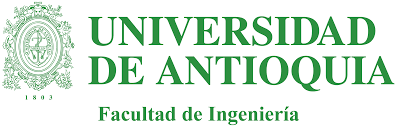

## Departamento de Ingeniería de Sistemas
### Estructuras de Datos
#### 2021-1

---
> Si no aceptas las consecuencias de tus elecciones, vivir será una tortura. 
##### *-Juan Cardona* 


## Introducing Counting Sort

---
### What is counting sort?

Counting sorts is a special sorting algorithm that runs in linear time with respect to two variables: 
- $n = len(array)$ 
- $k = maxValue - minValue + 1$ 
- $O(n+k)$

---
It is a sorting algorithm where we know something about the input, they are all positive integers. 

Counting sort assumes that each element in a $arr$ has a value ranging from $minValue$ to $maxValue$, with $(minValue, maxValue) \epsilon Enteros$. 

- $arr$
- $minValue$
- $maxValue$




## Preparation    

For each element in the list, counting sort determines the number of elements that are less than it. Counting sort can use this information to place the element directly into the correct slot of the output array.

Counting sort uses three lists: 
- the input list, $arr=[3, 8, \dots, minValue, 34, 6, \dots,maxValue]$
- the output list, $solution=[0,0,0, \dots, n]$
- temporary memory list, $counter=[0,0,0, \dots, k]$
  - $n=len(arr)=len(solution)$
  - $k=len(counter)=maxValue-minValue+1$


In [184]:
import numpy.random as rdm

arr = list(rdm.randint(11,size=5)) # the random imput list
n = len(arr) # longitude of the imput list
print('arr = '+str(arr))
print('n = '+str(n))
maxValue = max(arr) # maximum value in the array
minValue = min(arr) # minimum value in the array 
k = maxValue - minValue + 1 # longitude of the memory array
print('maxValue = '+ str(maxValue))
print('minValue = '+ str(minValue))
print('k = '+ str(k))
solution = [0]*n # empty soution array
counter = [0]*k # empty counter array
print('solution = '+ str(solution))
print('counter = '+ str(counter))

arr = [8, 5, 6, 10, 10]
n = 5
maxValue = 10
minValue = 5
k = 6
solution = [0, 0, 0, 0, 0]
counter = [0, 0, 0, 0, 0, 0]


## Step 1
Counting sort starts by going through $arr$, and for each element $arr[i]$, it goes to the index of $counter$ that has the same value as $arr[i]$ (so it goes to $counter[arr[i]]$) and increments the value of $counter[arr[i]]$ by one. 

In [185]:
for value in arr:
    counter[value - minValue]+=1 # fill the empty array with the ocurrences 
print('counter = ' +str(counter))

counter = [1, 1, 0, 1, 0, 2]


## step 2
Next, modify $counter$ so that each $counter[i]$ includes the number of elements less than it. This can be accomplished by going through $counter$ and replacing each $counter[i]$ value with $counter[i] + counter[i-1]$. This step allows counting sort to determine at what index in $solution$ an element should be placed.

In [186]:
print('counter = ' +str(counter))
for _ in range(1, len(counter)): 
    counter[_] = counter[_-1] + counter[_] # fill couter with the ruccing sum
    print('counter = ' +str(counter))

counter = [1, 1, 0, 1, 0, 2]
counter = [1, 2, 0, 1, 0, 2]
counter = [1, 2, 2, 1, 0, 2]
counter = [1, 2, 2, 3, 0, 2]
counter = [1, 2, 2, 3, 3, 2]
counter = [1, 2, 2, 3, 3, 5]


## Step 3
Then, starting at the end of $arr$, add elements to $solution$ by checking the value of $arr[i]$, going to $counter[arr[i]]$, writing the value of the element at $arr[i]$ to $solution[counter[arr[i]]]$. Finally, decrement the value of $counter[A[i]]$ by $1$ since that slot in $solution$ is now occupied.

In [187]:
print('arr = ' +str(arr))
print('counter = ' +str(counter))
for _ in arr[::-1]:
    counter[_-minValue]-=1 # remove 1 occurence in counter to 
    solution[counter[_-minValue]] = _ # place ir on solution
print("solution = "+str(solution))

arr = [8, 5, 6, 10, 10]
counter = [1, 2, 2, 3, 3, 5]
solution = [5, 6, 8, 10, 10]


## $O(n+k)$

### Step 1 iterations $\sum_{i=0}^{n-1} 1 = n-1$
### Step 2 iterations $\sum_{i=1}^{k} 1 = k-1$
### Step 3 iterations $\sum_{i=0}^{n-1} 1 = n-1$

$O(n+k) = \sum_{i=0}^{n-1} + \sum_{i=1}^{k} + \sum_{i=0}^{n-1} 1$

$O(n+k) = n-1 + k-1 + n-1 $

$O(n+k) = 2n+k-3$

In [204]:
def getRandomGraph(points):
    import numpy.random as rdm

    sol = []
    for _ in range(0, points):
        for i in range(0,2):
            arr = list(rdm.randint((5+_)*3,size=5+_))
            n = len(arr)
            maxValue = max(arr)
            minValue = min(arr) 
            k = maxValue - minValue + 1
            sol.append([n+k,2*n+k-3])
    return(sol)

In [205]:
graph = getRandomGraph(50)

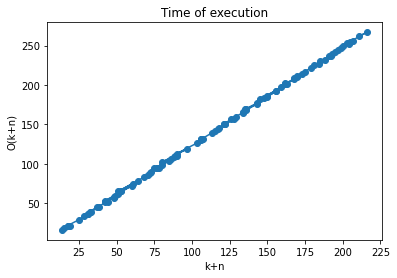

In [206]:
import matplotlib.pyplot as plt

kn = [i[0] for i in graph]
Okn = [i[1] for i in graph]

plt.plot(kn, Okn, 'o-')
plt.title('Time of execution')
plt.ylabel('O(k+n)')
plt.xlabel('k+n')

plt.show()